# Pandemic overview in Spain

This article's goal is to explore the data regarding the covid-19 pandemic in Spain. For that purpose, we'll use matplot library to visualise the pandemic evolution over time regarding:

+ Number of infections
+ Number of hospitalisations
+ Number of Intensive Care Units
+ Number of deaths

We'll also explore the above mentioned data grouped by autonomous region, province, age group and gender

For this purpose, we shall import all the functions and necessary imports:

In [1]:
from imports_functions import *
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


We'll use as data set the covid information available on:
https://datamarket.es/#covid-19-dataset

We'll call db1 the whole dataset imported from the above mentioned website:

In [3]:
db1 = pd.read_csv('covid-19-sample_new.csv')

Let's perform some data cleaning thanks to clean function;

In [4]:
db1 =clean_data(db1)

## Region

Let's visualise the above mentioned statistics grouped by **autonomous region**. For than, we'll use the organise function that receives as inputs a dataframe (in this case db1) and groups it by a specific column (in this case, autonomous_region). Additionally, it adds 4 columns to the final DataFrame with the relative frequency of each statistics (rounded to 3 decimal places):

In [5]:
region = organise(db1, 'autonomous_region')

Let's plot this dataframe for the proportion of the **number of infections** using the graph_bar function:

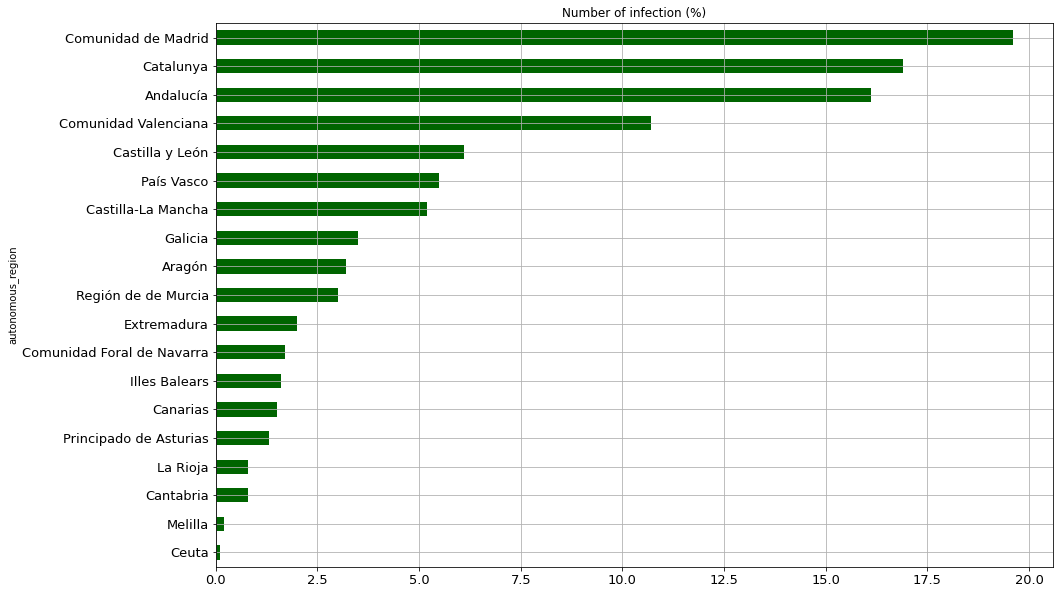

In [6]:
graph_bar('vertical', sort_data(region, 'Number of infection (%)'), 
          'Number of infection (%)', 'Number of infection (%)', 'Darkgreen')

We can observe that over 50% of the number of infections are in only 3 regions:

+ 19.5% in **Comunidad de Madrid**
+ 16.9% in **Catalunya**
+ 16.1% in **Andalucía**

Let's plot this dataframe for the proportion of the **number of hospitalisation** using the graph_bar function:

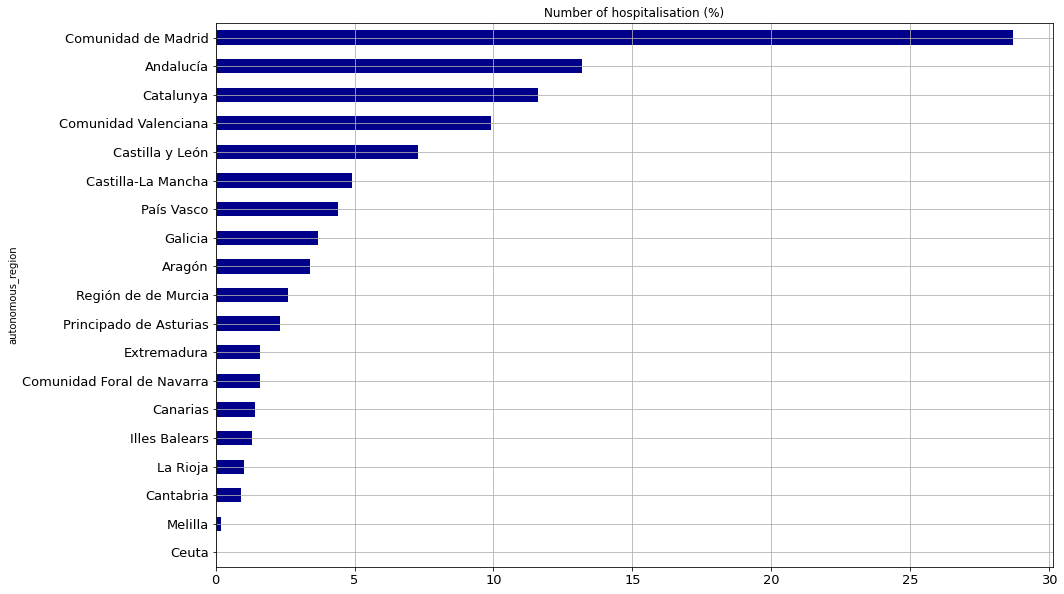

In [7]:
graph_bar('vertical', sort_data(region, 'Number of hospitalisation (%)'), 
          'Number of hospitalisation (%)', 'Number of hospitalisation (%)', 'Darkblue')

Here we observe a shift between **Andalucía** and **Catalunya**:

+ 28.7% in **Comunidad de Madrid**
+ 13,2% in **Andalucía**
+ 11,6% in **Catalunya**

**Comunidad de Madrid** is by far the region with higher number of hospitalisations (2 times higher than Andalucía). We also observe that **Comunidad Valenciana** reaches almost 10% of the total of hospitalisations

Let's plot this dataframe for the proportion of the **number of Intensive Care Unit** using the graph_bar function:

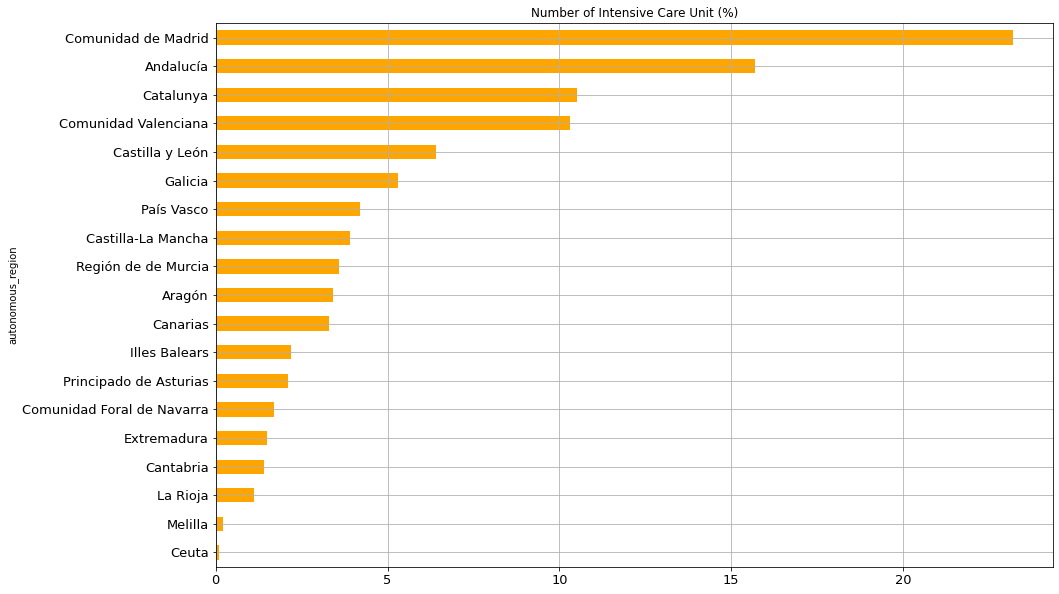

In [8]:
graph_bar('vertical', sort_data(region, 'Number of Intensive Care Unit (%)'), 
          'Number of Intensive Care Unit (%)', 'Number of Intensive Care Unit (%)', 'Orange')

**Comunidad de Madrid** still is the most affected region with over 25% of the total Intensive Care Units events. **Andalucía** and **Catalunya** contribute significantly less with 15.7% and 10.5%. **Comunidad Valenciana** contributes with the almost the same as Catalunya with 10.3%

Let's plot this dataframe for the proportion of the **number of deaths** using the graph_bar function:

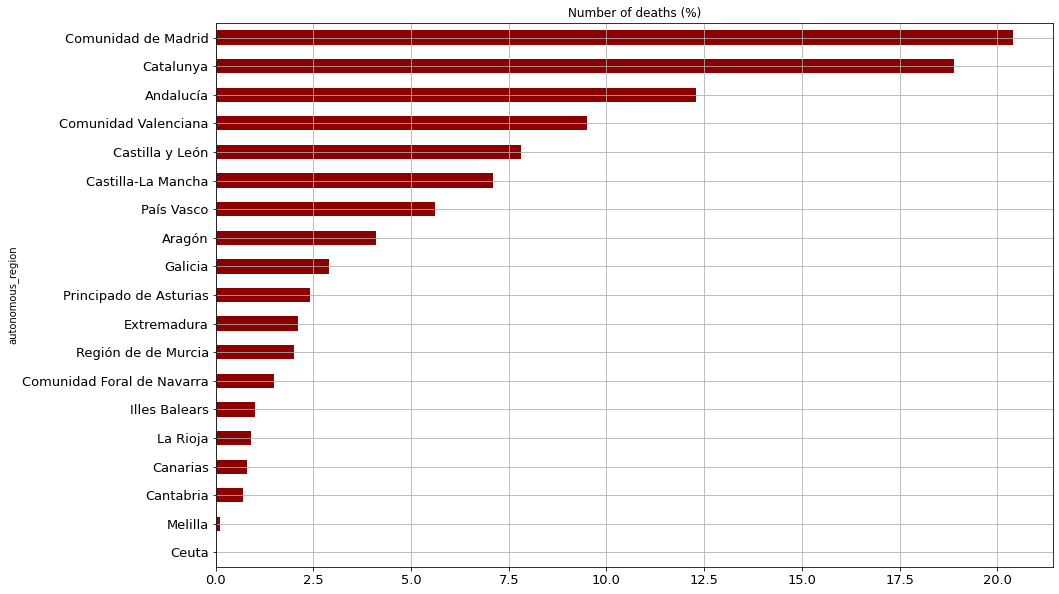

In [9]:
graph_bar('vertical', sort_data(region, 'Number of deaths (%)'), 
          'Number of deaths (%)', 'Number of deaths (%)', 'Darkred')

**Comunidad de Madrid** and **Catalunya** represent almost 40% of the deceased in Spain. With Andalucía, we reach over 50% of the total deaths in Spain due to covid-19

## Province

Let's visualise the above mentioned statistics grouped by **province**. 

In [10]:
province = organise(db1, 'province')

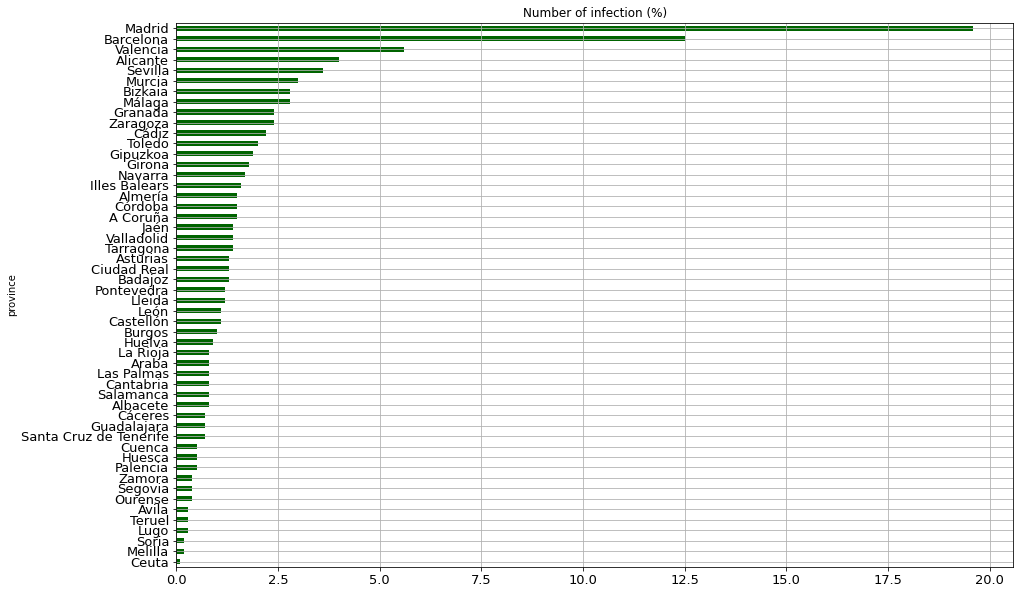

In [11]:
graph_bar('vertical', sort_data(province, 'Number of infection (%)'), 
          'Number of infection (%)', 'Number of infection (%)', 'Darkgreen')

It's expectable that the provinces with higher number of infections (**Madrid** and **Barcelona**) are the ones beloging to the above mentioned autonomous regions. Still, **Valencia** and **Alicante** appear with 5.6% and 4.0% respectively, cities beloging to the **Comunidad Valenciana** which is the fourth with more infectious, after **Andalucía**

Let's plot this dataframe for the proportion of the **number of hospitalisation** using the graph_bar function:

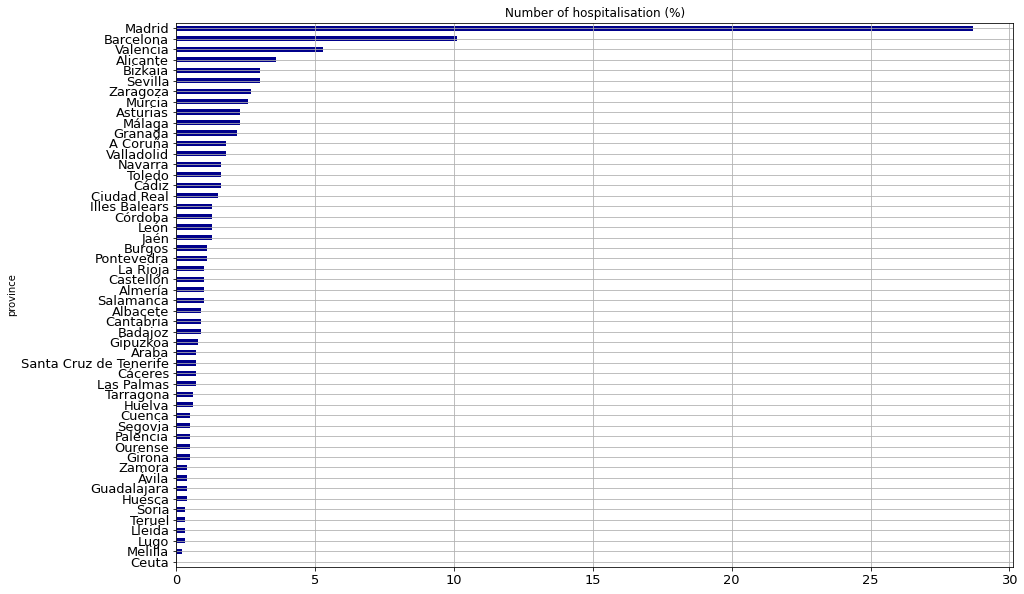

In [12]:
graph_bar('vertical', sort_data(province, 'Number of hospitalisation (%)'), 
          'Number of hospitalisation (%)', 'Number of hospitalisation (%)', 'Darkblue')

**Madrid** is by far the province with the higher number of hospitalisations, counting 28.7% of the total hospitalisations, followed by **Barcelona** with 12.5% and **Valencia** with 5.3%

Let's plot this dataframe for the proportion of the **number of Intensive Care Units** using the graph_bar function:

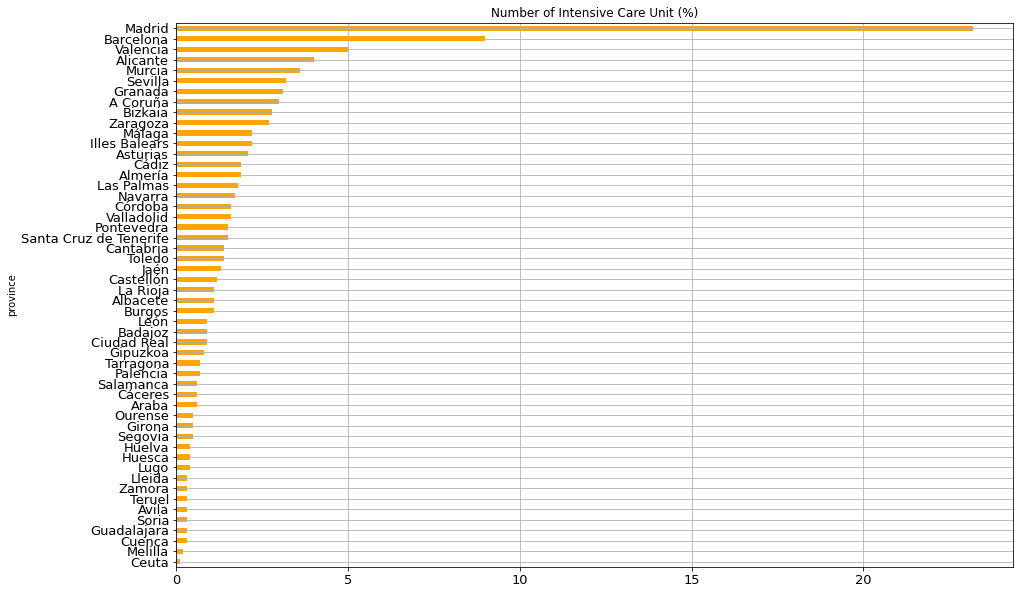

In [13]:
graph_bar('vertical', sort_data(province, 'Number of Intensive Care Unit (%)'), 
          'Number of Intensive Care Unit (%)', 'Number of Intensive Care Unit (%)', 'Orange')

**Madrid** is by far the province with the higher number of Intensive Care Units, counting 23.2% of the total, followed by Barcelona with 9.0% and Valencia with 5.0%

Let's plot this dataframe for the proportion of the **number of deaths** using the graph_bar function:

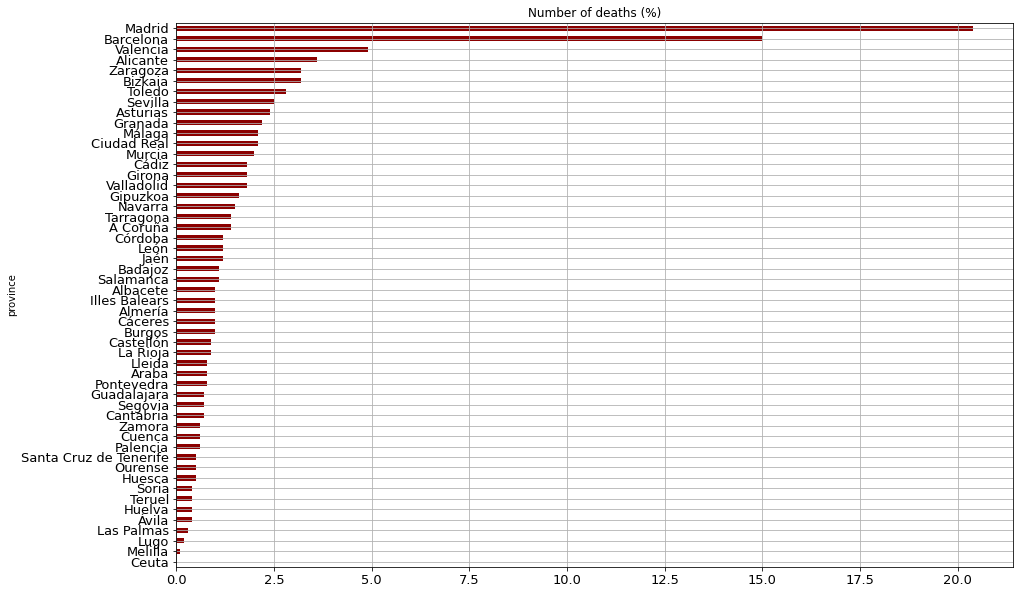

In [14]:
graph_bar('vertical', sort_data(province, 'Number of deaths (%)'), 
          'Number of deaths (%)', 'Number of deaths (%)', 'Darkred')

**Madrid** is still by far the province with the higher number of deaths, counting 20.4% of the total, followed by **Barcelona** with 15.0% and **Valencia** with 4.9%

## Statistics over time

By plotting any statistics over time, we find many high oscillations. Let's inspect by plotting the moving average of the number of infections with 1, 3, 5, 7, 9, 11 and 13 days. To do such, we should group our data by date (therefore, using the evolution function) and plot the moving average for the mentioned days (therefore, inspect_mov_ave function):

In [15]:
bydate = evolution(db1)

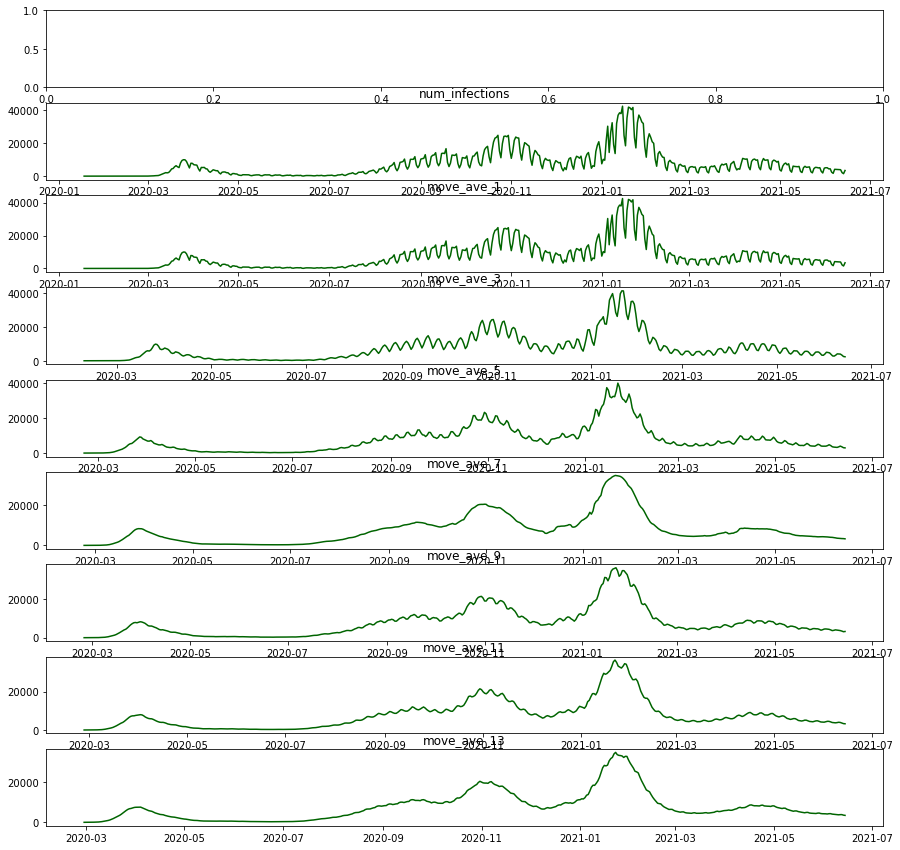

In [18]:
inspect_mov_ave(bydate)

To evidence this reduction on the variance of the data, let's plot the daily **number of infections** and its corresponding 7 day moving average by using the function compare_7mov_ave:

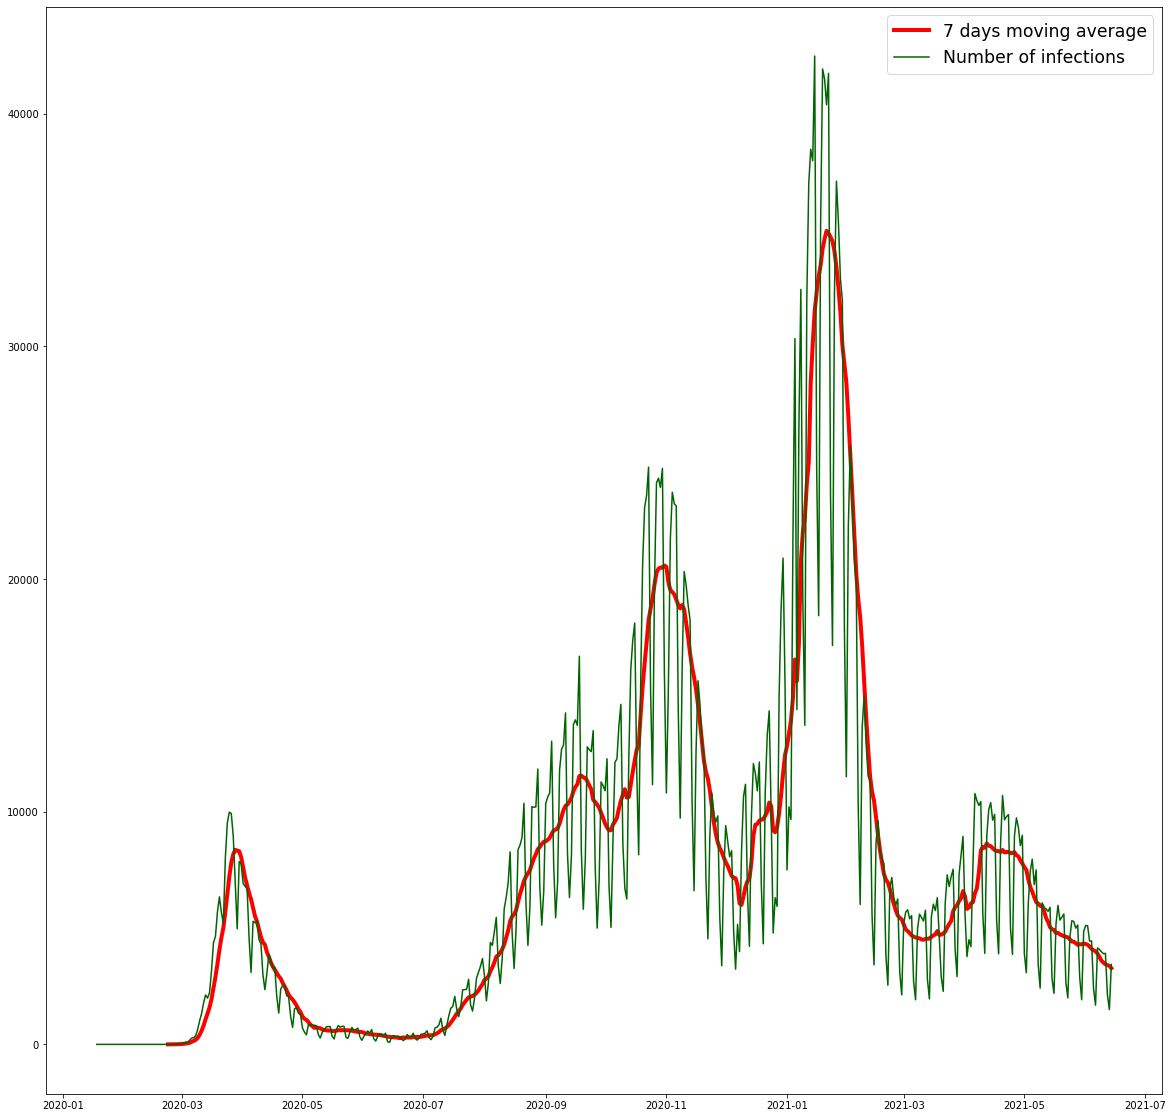

In [19]:
compare_7mov_ave(bydate)

It's clear that this implies a significant reduction on the data variance. This will be usefull to train machine learning models to predict the statistics, as this will imply an error reduction, namely on the root square mean error, measures. For now, let us plot over the daily results, its corresponding 7 day moving average, and cumulative results. To achieve such, let's use the overview function, built for this purpose:

### Number of infections

In [ ]:
overview(bydate, 'Number of infections')

We can clearly observe the peaks of the pandemy. One might guess that the during the first wave (march 2020) there wasn't many testing, and therefore, the results would be lower than they actually would be. By observing the cumulated curve, one might state that we are observing a desacelaration rate, as the slope of the tangent line (derivative) seems to be decreasing

### Number of hospitalisations

In [ ]:
overview(bydate, 'Number of hospitalisations')

Here there are two clear peaks, in its beggining and in January 2021. As for the cumulated curve, there seems to be a constant rate in the number of hospitalisations per day. Although, it seems to have a decrease since March 2021.

### Number of Intesive Care Units

In [ ]:
overview(bydate, 'Number of Intensive Care Units')

We can clearly observe the peaks of the pandemy. As for the number of hospitalisations, one might guess that the during the first wave (march 2020) there wasn't many testing, and therefore, the results would be lower than they actually would be. By observing the cumulated curve, one might state that we are observing a desacelaration rate, as the slope of the tangent line (derivative) seems to be decreasing.

### Number of deaths

In [ ]:
overview(bydate, 'Number of deaths')

The number of deaths is similiar to the above mentioned

## Last 7 days

For the security purposes, it is important to monitor the last seven days statistics. Therefore, let's apply the functions above to a subset of the bydate dataframe with the last seven days:

In [ ]:
last7 = bydate.tail(7)

### Number of infections

In [ ]:
overview(last7, 'Number of infections')

The last increase for the 13th to the 14th of june may be explained by the fact that on the 13th of june it was Sunday. Hence, not laboratories or healthcare institutions didn't advise the number of detected cases  

### Number of hospitalisations

In [ ]:
overview(last7, 'Number of hospitalisations')

Even though we see an increase, it seems that on average we are on a decreasing rate

### Number of Intensive Care Units

In [ ]:
overview(last7, 'Number of Intensive Care Units')

Even though we see an increase, it seems that on average we are on a decreasing rate

### Number of deaths

In [ ]:
overview(last7, 'Number of deaths')

Even though we see an increase, it seems that on average we are on a decreasing rate

## Ages

Let's explore the above statistics over group ages:

In [ ]:
ages = organise(db1, 'age_interval')

### Number of infections

In [ ]:
graph_bar('horizontal', ages, 'Number of infection (%)',
          'Number of infection (%)', 'Darkgreen')

There seems to be a dominant age intervals when it comes to the infections, between 30 and 59 years

### Number of hospitalisations

In [ ]:
graph_bar('horizontal', ages, 'Number of hospitalisation (%)',
          'Number of hospitalisation (%)', 'DarkBlue')

Here we seem a different distribution: starting at age 50, over 15% of the infected population seeks medical attention in an hospital

### Number of Intensive Care Units

In [ ]:
graph_bar('horizontal', ages, 'Number of Intensive Care Unit (%)',
          'Number of Intensive Care Unit (%)', 'Orange')

It seems people for 50 years and above need Intensive Care medical attention to fight the infection. Although, there seems to be a very low rate of people over 80 years old that needs this attention. This might be explained by the saturation of hospitals, in where people over a certain age would be sent home, as they wasn't any resources to treat these people

### Number of deaths

In [ ]:
graph_bar('horizontal', ages, 'Number of deaths (%)',
          'Number of deaths (%)', 'Darkred')

Clearly, the above graph sustains the above statement: people ov er a certain age, namely 80, wouldn't be put in Intensive Care Units, and would be sent home. Unfortunately, these people weren't able to resist to the desease

### Severe Cases

To highlight the above point, let's plot only the cases in where people were either hospitalsed, put into Intensive Care Units or found death over group age:

In [ ]:
severe_cases(ages)

It's clear the phenomenon: elder people would get the necessary medical attention to fight the desease, and would be sent home. Its effect is the high mortality rate, and low intesive care unit rate for for this group age

## Gender

Lastly, let's apply the same function for the gender group (male or female):

In [ ]:
gender = organise(db1, 'sex')

### Number of infections

In [ ]:
graph_bar('horizontal', gender, 'Number of infection (%)',
          'Number of infection (%)', 'Darkgreen')

### Number of hospitalisations

In [ ]:
graph_bar('horizontal', gender, 'Number of hospitalisation (%)',
          'Number of hospitalisation (%)', 'Darkblue')

### Number of hospitalisations

In [ ]:
graph_bar('horizontal', gender, 'Number of Intensive Care Unit (%)',
          'Number of Intensive Care Unit (%)', 'Orange')

There seems to be a significant difference when it comes to the Intensive Care Units for male and female gender. Female gender seems to be less vulnerable to need intensive medical care

### Number of deaths

In [ ]:
graph_bar('horizontal', gender, 'Number of deaths (%)',
          'Number of deaths (%)', 'Darkred')

In [ ]:
region_province_age = organise(db1, ['autonomous_region', 'province', 'age_interval'])

# Exports

Lastly, let's extract the above information to csv, so we can use a visualisation:

In [ ]:
region_province_age.to_csv('region_province_age.csv', index=True)

In [ ]:
bydate.to_csv('bydate.csv', index=True)

In [ ]:
predictions = pd.read_csv('predictions.csv')

In [ ]:
predictions = predictions.rename(columns= {'Unnamed: 0': 'date'})

In [ ]:
last7 = pd.concat([last7, predictions])

In [ ]:
last7['date'] = pd.to_datetime(last7.date)

In [ ]:
last7.to_csv('last7.csv', index=True)